___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew
import scipy.stats as stats
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ingest the data to notebook

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head().T

,0,1,2,3,4
age,63.0,37.0,41.0,56.0,57.0
sex,1.0,1.0,0.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0
trestbps,145.0,130.0,130.0,120.0,120.0
chol,233.0,250.0,204.0,236.0,354.0
fbs,1.0,0.0,0.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0
thalach,150.0,187.0,172.0,178.0,163.0
exang,0.0,0.0,0.0,0.0,1.0
oldpeak,2.3,3.5,1.4,0.8,0.6


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.select_dtypes("object").head()

""
0
1
2
3
4


In [9]:
for col in df.select_dtypes('object').columns:
    print(f"{col:<20}:", df[col].nunique())

<AxesSubplot:xlabel='target', ylabel='Count'>

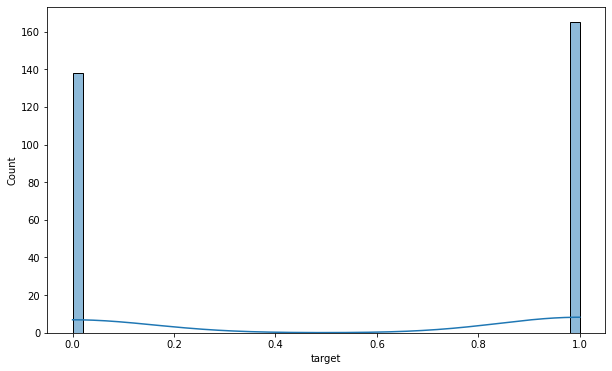

In [10]:
sns.histplot(df.target, bins = 50, kde=True)

<AxesSubplot:>

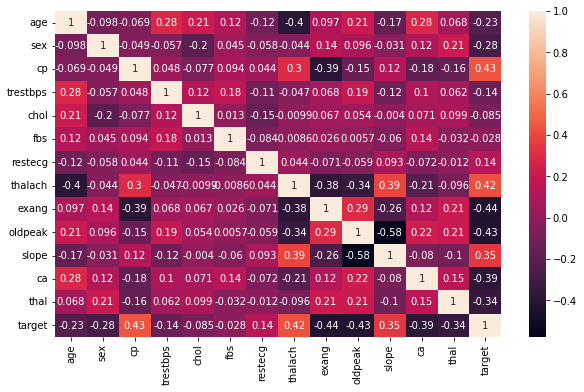

In [11]:
sns.heatmap(df.corr(), annot=True)

In [20]:
df.corr()[(df.corr()>= 0.9) & (df.corr() < 1)].any().any()

False

In [21]:
df.corr()[(df.corr()>= -0.9) & (df.corr() < -1)].any().any()

False

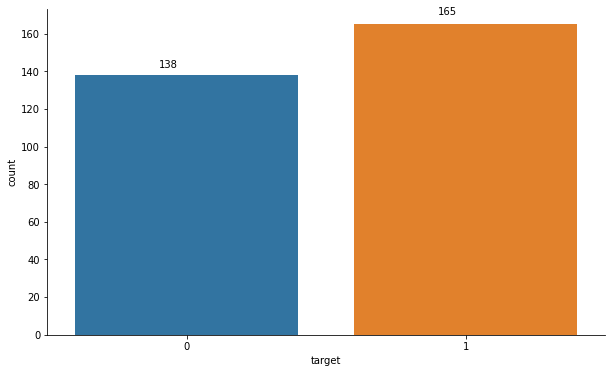

In [8]:
ax = sns.countplot(df['target'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

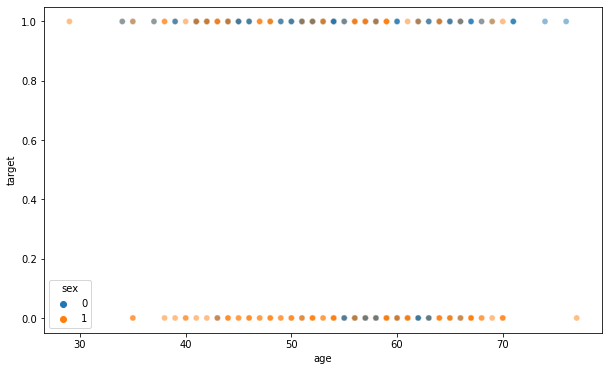

In [6]:
sns.scatterplot(x='age', y='target', data=df, hue='sex', alpha=0.5);

# Data Preprocessing

## Train | Test Split and Scaling

In [12]:
X = df.drop('target',axis=1)
y = df['target']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_model = LogisticRegression()

In [21]:
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [22]:
log_model.coef_

array([[-0.08725068, -0.6417029 ,  0.89809385, -0.31557464, -0.24248918,
         0.09299338,  0.18864842,  0.3933351 , -0.47994438, -0.47415917,
         0.42376881, -0.82516775, -0.5581558 ]])

In [23]:
log_model.intercept_

array([0.24819849])

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.99459645, 0.00540355],
       [0.15522764, 0.84477236],
       [0.25693359, 0.74306641],
       [0.02374954, 0.97625046],
       [0.98174361, 0.01825639],
       [0.11081562, 0.88918438],
       [0.05751249, 0.94248751],
       [0.98592779, 0.01407221],
       [0.960748  , 0.039252  ],
       [0.16562719, 0.83437281],
       [0.97003167, 0.02996833],
       [0.23679849, 0.76320151],
       [0.94991998, 0.05008002],
       [0.59713932, 0.40286068],
       [0.07603945, 0.92396055],
       [0.18632361, 0.81367639],
       [0.01292489, 0.98707511],
       [0.24909519, 0.75090481],
       [0.15253405, 0.84746595],
       [0.99074853, 0.00925147],
       [0.99107583, 0.00892417],
       [0.32351429, 0.67648571],
       [0.32238315, 0.67761685],
       [0.28572102, 0.71427898],
       [0.58211298, 0.41788702],
       [0.03292785, 0.96707215],
       [0.98029134, 0.01970866],
       [0.21517323, 0.78482677],
       [0.97039574, 0.02960426],
       [0.94742646, 0.05257354],
       [0.

## X_test + y_yest + y_pred + y_pred_proba

In [26]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
221,55,1,0,140,217,0,1,111,1,5.600,0,0,3,0
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1
89,58,0,0,100,248,0,0,122,0,1.000,1,0,2,1
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1
201,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0
12,49,1,1,130,266,0,1,171,0,0.600,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.400,2,0,2,1
187,54,1,0,124,266,0,0,109,1,2.200,1,1,3,0
240,70,1,2,160,269,0,1,112,1,2.900,1,1,3,0
117,56,1,3,120,193,0,0,162,0,1.900,1,0,3,1


In [27]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba
221,55,1,0,140,217,0,1,111,1,5.600,0,0,3,0,0.005
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1,0.845
89,58,0,0,100,248,0,0,122,0,1.000,1,0,2,1,0.743
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1,0.976
201,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0,0.018
12,49,1,1,130,266,0,1,171,0,0.600,2,0,2,1,0.889
65,35,0,0,138,183,0,1,182,0,1.400,2,0,2,1,0.942
187,54,1,0,124,266,0,0,109,1,2.200,1,1,3,0,0.014
240,70,1,2,160,269,0,1,112,1,2.900,1,1,3,0,0.039
117,56,1,3,120,193,0,0,162,0,1.900,1,0,3,1,0.834


In [28]:
test_data["pred"] = y_pred
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
221,55,1,0,140,217,0,1,111,1,5.600,0,0,3,0,0.005,0
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1,0.845,1
89,58,0,0,100,248,0,0,122,0,1.000,1,0,2,1,0.743,1
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1,0.976,1
201,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0,0.018,0
12,49,1,1,130,266,0,1,171,0,0.600,2,0,2,1,0.889,1
65,35,0,0,138,183,0,1,182,0,1.400,2,0,2,1,0.942,1
187,54,1,0,124,266,0,0,109,1,2.200,1,1,3,0,0.014,0
240,70,1,2,160,269,0,1,112,1,2.900,1,1,3,0,0.039,0
117,56,1,3,120,193,0,0,162,0,1.900,1,0,3,1,0.834,1


In [29]:
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
265,66,1,0,112,212,0,0,132,1,0.100,2,1,2,0,0.262,0
279,61,1,0,138,166,0,0,125,1,3.600,1,1,2,0,0.030,0
243,57,1,0,152,274,0,1,88,1,1.200,1,1,3,0,0.012,0
160,56,1,1,120,240,0,1,169,0,0.000,0,0,2,1,0.763,1
39,65,0,2,160,360,0,0,151,0,0.800,2,0,2,1,0.918,1
124,39,0,2,94,199,0,1,179,0,0.000,2,0,2,1,0.997,1
232,55,1,0,160,289,0,0,145,1,0.800,1,1,3,0,0.022,0
171,48,1,1,110,229,0,1,168,0,1.000,0,0,3,0,0.530,1
128,52,0,2,136,196,0,0,169,0,0.100,1,0,2,1,0.974,1
90,48,1,2,124,255,1,1,175,0,0.000,2,2,2,1,0.890,1


## Model Performance on Classification Tasks

In [30]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [31]:
accuracy_score(y_test,y_pred)

0.8360655737704918

In [32]:
precision_score(y_test, y_pred)

0.7777777777777778

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [34]:
confusion_matrix(y_test,y_pred)

array([[23,  8],
       [ 2, 28]], dtype=int64)

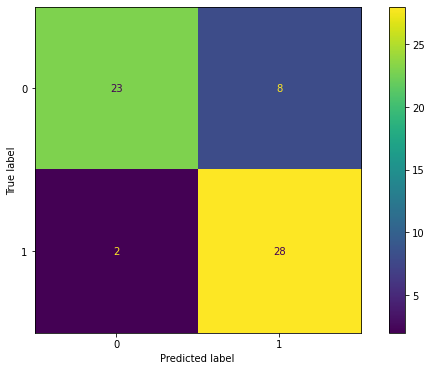

In [35]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



In [37]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       107
           1       0.83      0.91      0.87       135

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.84       242
weighted avg       0.85      0.84      0.84       242



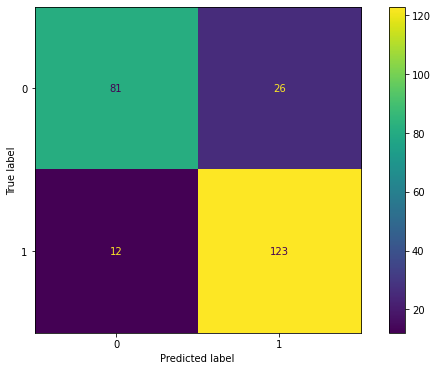

In [38]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

## Cross Validate

In [39]:
from sklearn.model_selection import cross_validate

In [40]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.005,0.003,0.840,0.857,0.857,0.857
2,0.005,0.003,0.800,0.800,0.857,0.828
3,0.004,0.002,0.833,0.812,0.929,0.867
4,0.002,0.004,0.708,0.706,0.857,0.774
5,0.004,0.003,0.875,0.923,0.857,0.889
6,0.004,0.003,0.833,0.846,0.846,0.846
7,0.007,0.002,0.792,0.786,0.846,0.815
8,0.003,0.002,0.625,0.643,0.692,0.667
9,0.006,0.003,0.875,0.857,0.923,0.889
10,0.003,0.001,0.958,1.000,0.923,0.960


In [41]:
df_scores.mean()[2:]

test_accuracy    0.814
test_precision   0.823
test_recall      0.859
test_f1          0.839
dtype: float64

In [42]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61

Train Set

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       107
           1       0.83      0.91      0.87       135

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.84       242
weighted avg       0.85      0.84      0.84       242



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [43]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

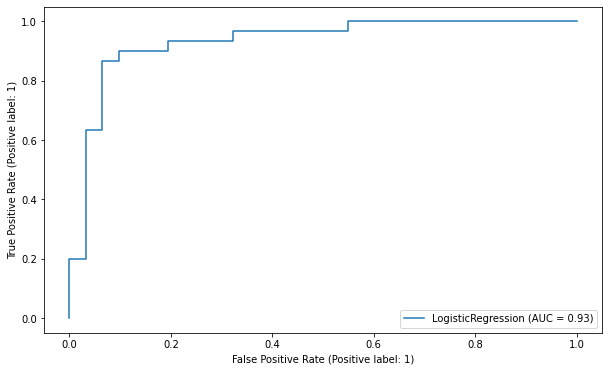

In [44]:
plot_roc_curve(log_model, X_test_scaled, y_test);

In [45]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.932258064516129

In [46]:
roc_auc_score(y_test, y_pred)

0.8376344086021505

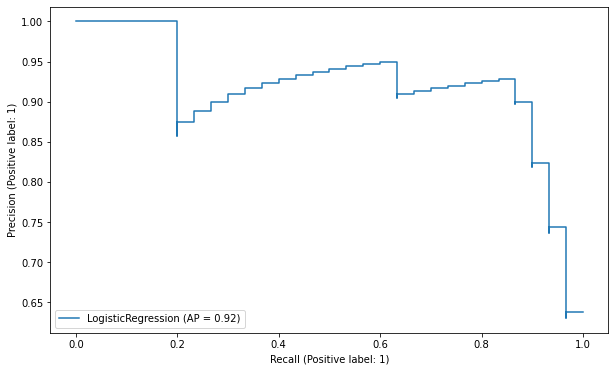

In [47]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

## Final Model and Model Deployment

In [48]:
scaler = StandardScaler().fit(X)

In [49]:
import pickle
pickle.dump(scaler, open("scaler_hearing", 'wb'))

In [50]:
X_scaled = scaler.transform(X)

In [51]:
final_model = LogisticRegression().fit(X_scaled, y)

In [52]:
pickle.dump(final_model, open("final_model_hearing", 'wb'))

In [53]:
my_dict = {"age": [20, 30, 40, 50, 60]}

In [54]:
sample = pd.DataFrame(my_dict)
sample

,age
0,20
1,30
2,40
3,50
4,60


In [55]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [56]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

ValueError: X has 1 features, but StandardScaler is expecting 13 features as input.

In [57]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

NameError: name 'sample_scaled' is not defined

# Implement KNN and Evaluate

## Train|Test Split and Scaling Data

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [59]:
X = df.drop('target',axis=1)
y = df['target']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
scaler = StandardScaler()

In [62]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [65]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [66]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [67]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [69]:
pd.DataFrame(y_pred_proba).head()

,0,1
0,1.000,0.000
1,0.600,0.400
2,0.200,0.800
3,0.800,0.200
4,0.200,0.800


In [70]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [71]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
282,0,1,0.800,0.200
119,1,1,0.800,0.200
5,1,1,1.000,0.000
146,1,1,1.000,0.000
164,1,1,0.600,0.400
254,0,1,0.800,0.200
244,0,0,0.200,0.800
79,1,1,0.600,0.400
272,0,0,0.400,0.600
6,1,1,0.800,0.200


## Model Performance on Classification Tasks

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [73]:
confusion_matrix(y_test, y_pred)

array([[35,  6],
       [ 6, 44]], dtype=int64)

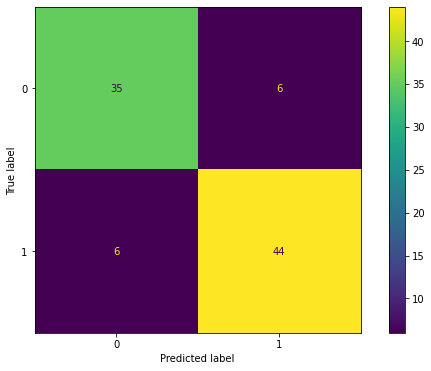

In [74]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [75]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35  6]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



## Elbow Method for Choosing Reasonable K Values

In [76]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [77]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

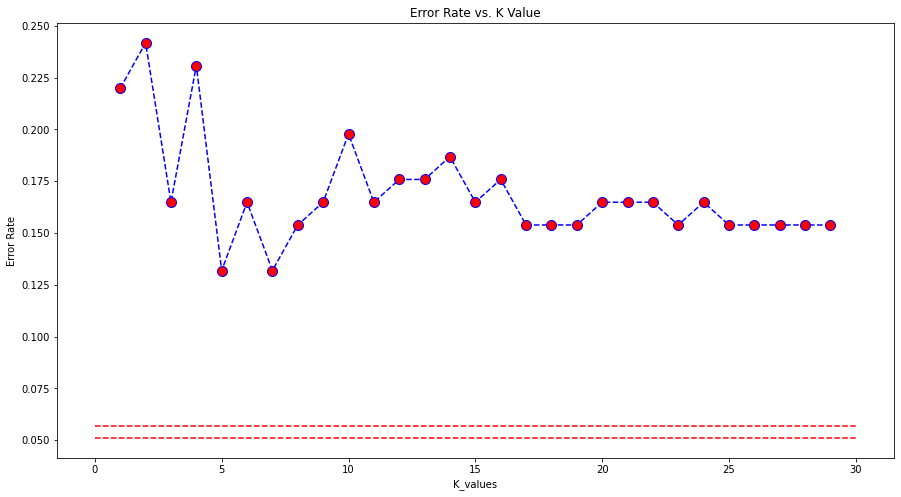

In [78]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.051, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.057, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

## Scores by Various K Values

In [79]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [80]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[30 11]
 [ 9 41]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91


Train_Set

[[ 97   0]
 [  0 115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [81]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=22

Test_Set

[[32  9]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91


Train_Set

[[ 74  23]
 [ 11 104]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        97
           1       0.82      0.90      0.86       115

    accuracy                           0.84       212
   macro avg       0.84      0.83      0.84       212
weighted avg       0.84      0.84      0.84       212



In [82]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Test_Set

[[33  8]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91


Train_Set

[[ 77  20]
 [ 12 103]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        97
           1       0.84      0.90      0.87       115

    accuracy                           0.85       212
   macro avg       0.85      0.84      0.85       212
weighted avg       0.85      0.85      0.85       212



In [83]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=16\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=16

Test_Set

[[31 10]
 [ 5 45]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.82      0.90      0.86        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91


Train_Set

[[ 76  21]
 [ 10 105]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        97
           1       0.83      0.91      0.87       115

    accuracy                           0.85       212
   macro avg       0.86      0.85      0.85       212
weighted avg       0.86      0.85      0.85       212



## Cross Validate For Optimal K Value

In [84]:
from sklearn.model_selection import cross_val_score, cross_validate

In [85]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002,0.004,0.727,0.750,0.750,0.750
2,0.001,0.004,0.864,0.909,0.833,0.870
3,0.001,0.003,0.714,0.750,0.750,0.750
4,0.001,0.002,0.857,0.846,0.917,0.880
5,0.001,0.003,0.857,0.800,1.000,0.889
6,0.003,0.077,0.762,0.750,0.818,0.783
7,0.001,0.002,0.810,0.733,1.000,0.846
8,0.000,0.003,0.952,0.917,1.000,0.957
9,0.001,0.002,0.667,0.700,0.636,0.667
10,0.001,0.002,0.762,0.800,0.727,0.762


In [86]:
df_scores.mean()[2:]

test_accuracy    0.797
test_precision   0.796
test_recall      0.843
test_f1          0.815
dtype: float64

## Predict New Observation

In [96]:
new_observation = [[3.5, 4.3, 5.5,6.5,7.5,8.5,9.5,2.5,1.5,10,11,12,13]]

In [97]:
knn_model.predict(new_observation)

array([0], dtype=int64)

In [98]:
knn_model.predict_proba(new_observation)

array([[0.65517241, 0.34482759]])

In [99]:
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-5.54370397,  7.68531996,  4.33551079, -7.30086878, -4.40198912,
        25.1148513 , 17.03498736, -6.50474559,  2.52641276,  8.25077439,
        15.6548722 , 11.97432135, 18.00175239]])

In [100]:
knn_model.predict(new_observation_scaled)

array([0], dtype=int64)

In [101]:
knn_model.predict_proba(new_observation_scaled)

array([[0.51724138, 0.48275862]])

## Gridsearch Method for Choosing Reasonable K Values

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
knn_grid = KNeighborsClassifier()

In [104]:
k_values= range(1,30)

In [105]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [106]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [107]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [108]:
knn_grid_model.best_params_

{'n_neighbors': 24, 'p': 1, 'weights': 'uniform'}

In [109]:
print('WITH K=21\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=21

Test_Set

[[32  9]
 [ 5 45]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91


Train_Set

[[ 76  21]
 [ 10 105]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        97
           1       0.83      0.91      0.87       115

    accuracy                           0.85       212
   macro avg       0.86      0.85      0.85       212
weighted avg       0.86      0.85      0.85       212



## Evaluating ROC Curves and AUC

In [110]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [111]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

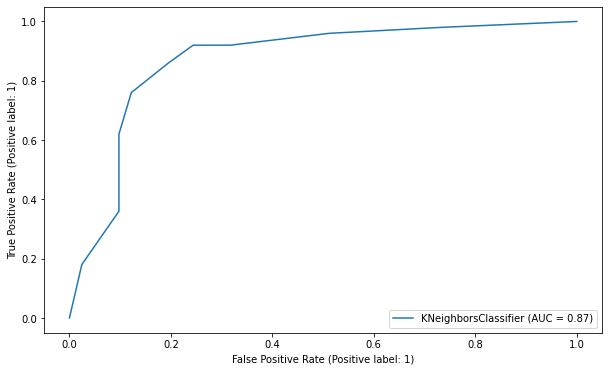

In [112]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [113]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8707317073170731

## Final Model and Model Deployment

In [114]:
import pickle

In [115]:
scaler = StandardScaler()

In [116]:
scaler.fit(X)

StandardScaler()

In [117]:
X_scaled = scaler.transform(X)

In [118]:
final_knn_model = KNeighborsClassifier(n_neighbors=9)

In [119]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

In [120]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

## Predict New Observations

In [121]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

In [122]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [123]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [125]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2


In [124]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000


In [126]:
new_obs = {"age": [20, 23, 24, 25, 27, 29, 32, 36],
           "cp": [1, 3, 3, 0, 2, 3, 1, 0]
          }

In [127]:
samples = pd.DataFrame(new_obs)
samples

,age,cp
0,20,1
1,23,3
2,24,3
3,25,0
4,27,2
5,29,3
6,32,1
7,36,0


In [128]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

ValueError: X has 2 features, but StandardScaler is expecting 13 features as input.

In [129]:
loaded_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=9)

In [130]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

NameError: name 'samples_scaled' is not defined

In [131]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

NameError: name 'predictions' is not defined

# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 